<a href="https://colab.research.google.com/github/Sunnn-y/NaturalLanguageProcessing/blob/main/20231020_%ED%82%A4%EC%9B%8C%EB%93%9C%EC%B6%94%EC%B6%9C_%EC%8B%A4%EC%8A%B5(TF_IDF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF-IDF 사용 키워드 추출

## 실습 1

In [4]:
import requests
from bs4 import BeautifulSoup
url = "https://n.news.naver.com/mnews/article/018/0005596218?sid=101"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, 'html.parser')
content = soup.find(class_ = 'newsct_article').text.replace('\n', '')

In [5]:
content

'기술혁신대전·경영혁신대회 통합 행사17~18일 이틀간 부산 벡스코서 열어중소기업 혁신 이끈 유공자에 포상혁신기업 전시·홍보하고 세미나 진행[이데일리 김경은 기자] 중소기업의 기술·경영 혁신 성과를 다루는 국내 최대 행사인 ‘2023 중소기업 기술·경영 혁신대전’이 오는 17~18일 부산 벡스코에서 열린다.(사진=2023 중소기업 기술·경영 혁신대전 공식 누리집)15일 중소벤처기업부에 따르면 중소기업 기술·경영 혁신대전은 ‘혁신형 중소기업, 세상을 바꾸다’라는 주제로 개최된다. △탄소중립·ESG △글로벌 △연구개발(R&D) 혁신 △디지털 △기술보호 등 5대 중점분야별 기술·경영 혁신성과를 공유하고 확산할 예정이다. 기술·경영 혁신대전은 급변하는 기술·경영환경에 대응해 중소기업의 혁신을 지원하기 위해 열리는 행사다. 2000년부터 시작한 ‘중소기업 기술혁신 대전’과 2018년부터 개최한 ‘중소기업 경영혁신대회’를 통합해 규모를 확대했다. 각 행사는 그동안 서울에서 열렸으나 올해는 2030 부산 엑스포 유치 홍보를 지원하기 위해 부산으로 옮겨 개최한다. 이틀간 열리는 행사에서는 중소기업 혁신 유공 포상을 비롯해 △기술·기능 인재 경진대회 △인수합병(M&A) 및 상생 투자를 위한 IR 피칭 포럼 △스케일업 팁스 컨퍼런스 등 중소기업 혁신성장을 위한 각종 세미나 및 컨퍼런스를 진행한다. 본 행사인 ‘중소기업 혁신 유공 시상식’은 이영 중기부 장관이 참석해 기술·경영혁신으로 우수한 성과를 달성하고 국가 경제 발전에 이바지한 중소기업 및 관계 유공자를 시상할 예정이다. 포상은 훈장(3점), 포장(4점), 대통령표창(20점), 국무총리표창(30점), 장관표창(171점) 등 총 228점이 수여된다.행사장에는 △탄소중립·ESG △글로벌 △R&D혁신 △디지털 △테마정책관 총 5개의 구역으로 나눠 주관기관별 전시·홍보부스를 운영하고 혁신 성과를 홍보한다.이번 행사는 온·오프라인에서 누구나 무료로 참석 가능하다. 온라인 참여는 공식 유튜브 채널과 누리집에서 생중계된다.'

In [6]:
# !pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.3 MB/s eta 0:00:00


### 데이터 전처리

- 형태소 분석

In [7]:
# 코모란
from konlpy.tag import Komoran
tokenizer = Komoran()

content_token = tokenizer.morphs(content)
print(content_token)

['기술', '혁신', '대전', '·', '경영', '혁신', '대회', '통합', '행사', '17', '~', '18', '일', '이틀', '간', '부산', '벡스코', '서', '열', '어', '중소기업', '혁신', '이끌', 'ㄴ', '유공자', '에', '포상', '혁신', '기업', '전시', '·', '홍보', '하', '고', '세미나', '진행', '[', '이데일리', '김경', '은', '기자', ']', '중소기업', '의', '기술', '·', '경영', '혁신', '성과', '를', '다루', '는', '국내', '최대', '행사', '이', 'ㄴ', '‘', '2023', '중소기업', '기술', '·', '경영', '혁신', '대전', '’', '이', '오', '는', '17', '~', '18', '일', '부산', '벡스코', '에서', '열리', 'ㄴ다', '.', '(', '사진', '=', '2023', '중소기업', '기술', '·', '경영', '혁신', '대전', '공식', '누리', '집', ')', '15', '일', '중소', '벤처기업', '부', '에', '따르', '면', '중소기업', '기술', '·', '경영', '혁신', '대전', '은', '‘', '혁신', '형', '중소기업', ',', '세상', '을', '바꾸', '다', '’', '이', '라는', '주제', '로', '개최', '되', 'ㄴ다', '.', '△', '탄소', '중립', '·', 'ESG', '△', '글로벌', '△', '연구개발', '(', 'R', '&', 'D', ')', '혁신', '△', '디지털', '△', '기술', '보호', '등', '5', '대', '중점', '분야', '별', '기술', '·', '경영', '혁신', '성과', '를', '공유', '하', '고', '확산', '하', 'ㄹ', '예정', '이', '다', '.', '기술', '·', '경영', '혁신', '대전', '은', '급변

- 한글자 제거

In [8]:
token_remove = []
for token in content_token:
  if len(token)>1:
    token_remove.append(token)
print(token_remove)

['기술', '혁신', '대전', '경영', '혁신', '대회', '통합', '행사', '17', '18', '이틀', '부산', '벡스코', '중소기업', '혁신', '이끌', '유공자', '포상', '혁신', '기업', '전시', '홍보', '세미나', '진행', '이데일리', '김경', '기자', '중소기업', '기술', '경영', '혁신', '성과', '다루', '국내', '최대', '행사', '2023', '중소기업', '기술', '경영', '혁신', '대전', '17', '18', '부산', '벡스코', '에서', '열리', 'ㄴ다', '사진', '2023', '중소기업', '기술', '경영', '혁신', '대전', '공식', '누리', '15', '중소', '벤처기업', '따르', '중소기업', '기술', '경영', '혁신', '대전', '혁신', '중소기업', '세상', '바꾸', '라는', '주제', '개최', 'ㄴ다', '탄소', '중립', 'ESG', '글로벌', '연구개발', '혁신', '디지털', '기술', '보호', '중점', '분야', '기술', '경영', '혁신', '성과', '공유', '확산', '예정', '기술', '경영', '혁신', '대전', '급변', '기술', '경영', '환경', '대응', '중소기업', '혁신', '지원', '위하', '열리', '행사', '2000', '부터', '시작', '중소기업', '기술', '혁신', '대전', '2018', '부터', '개최', '중소기업', '경영', '혁신', '대회', '통합', '규모', '확대', '행사', '그동안', '서울', '에서', '열리', '으나', '올해', '2030', '부산', '엑스포', '유치', '홍보', '지원', '위하', '부산', '으로', '옮기', '개최', 'ㄴ다', '이틀', '열리', '행사', '에서', '중소기업', '혁신', '유공', '포상', '비롯', '기술', '기능', '인재', '경진', '대회', '인수', 

- 불용어 처리

In [9]:
stop_word = ['17','18','2023','ㄴ다','에서']
token_list = []
for token in token_remove:
  if token not in stop_word:
    token_list.append(token)
print(token_list)

['기술', '혁신', '대전', '경영', '혁신', '대회', '통합', '행사', '이틀', '부산', '벡스코', '중소기업', '혁신', '이끌', '유공자', '포상', '혁신', '기업', '전시', '홍보', '세미나', '진행', '이데일리', '김경', '기자', '중소기업', '기술', '경영', '혁신', '성과', '다루', '국내', '최대', '행사', '중소기업', '기술', '경영', '혁신', '대전', '부산', '벡스코', '열리', '사진', '중소기업', '기술', '경영', '혁신', '대전', '공식', '누리', '15', '중소', '벤처기업', '따르', '중소기업', '기술', '경영', '혁신', '대전', '혁신', '중소기업', '세상', '바꾸', '라는', '주제', '개최', '탄소', '중립', 'ESG', '글로벌', '연구개발', '혁신', '디지털', '기술', '보호', '중점', '분야', '기술', '경영', '혁신', '성과', '공유', '확산', '예정', '기술', '경영', '혁신', '대전', '급변', '기술', '경영', '환경', '대응', '중소기업', '혁신', '지원', '위하', '열리', '행사', '2000', '부터', '시작', '중소기업', '기술', '혁신', '대전', '2018', '부터', '개최', '중소기업', '경영', '혁신', '대회', '통합', '규모', '확대', '행사', '그동안', '서울', '열리', '으나', '올해', '2030', '부산', '엑스포', '유치', '홍보', '지원', '위하', '부산', '으로', '옮기', '개최', '이틀', '열리', '행사', '중소기업', '혁신', '유공', '포상', '비롯', '기술', '기능', '인재', '경진', '대회', '인수', '합병', '상생', '투자', '위하', 'IR', '피칭', '포럼', '스케일', '팁스', '컨퍼런스', '중소기업', '혁신',

In [10]:
content_token = ' '.join(token_list)
content_token

'기술 혁신 대전 경영 혁신 대회 통합 행사 이틀 부산 벡스코 중소기업 혁신 이끌 유공자 포상 혁신 기업 전시 홍보 세미나 진행 이데일리 김경 기자 중소기업 기술 경영 혁신 성과 다루 국내 최대 행사 중소기업 기술 경영 혁신 대전 부산 벡스코 열리 사진 중소기업 기술 경영 혁신 대전 공식 누리 15 중소 벤처기업 따르 중소기업 기술 경영 혁신 대전 혁신 중소기업 세상 바꾸 라는 주제 개최 탄소 중립 ESG 글로벌 연구개발 혁신 디지털 기술 보호 중점 분야 기술 경영 혁신 성과 공유 확산 예정 기술 경영 혁신 대전 급변 기술 경영 환경 대응 중소기업 혁신 지원 위하 열리 행사 2000 부터 시작 중소기업 기술 혁신 대전 2018 부터 개최 중소기업 경영 혁신 대회 통합 규모 확대 행사 그동안 서울 열리 으나 올해 2030 부산 엑스포 유치 홍보 지원 위하 부산 으로 옮기 개최 이틀 열리 행사 중소기업 혁신 유공 포상 비롯 기술 기능 인재 경진 대회 인수 합병 상생 투자 위하 IR 피칭 포럼 스케일 팁스 컨퍼런스 중소기업 혁신 성장 위하 각종 세미나 컨퍼런스 진행 행사 중소기업 혁신 유공 시상식 이영 중기 장관 참석 기술 경영 혁신 으로 우수 성과 달성 국가 경제 발전 이바지 중소기업 관계 유공자 시상 예정 포상 훈장 포장 대통령 표창 20 국무총리 표창 30 장관 표창 171 228 수여 행사 탄소 중립 ESG 글로벌 혁신 디지털 테마 정책관 구역 으로 나누 주관 기관 전시 홍보 부스 운영 혁신 성과 홍보 이번 행사 오프라인 누구 무료 참석 가능 온라인 참여 공식 유튜브 채널 누리 중계'

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
tfidf_v = tfidf_vect.fit_transform([content_token])

keyword = tfidf_v.tocoo()
# coo : Coordinate으로 0이 아닌 데이터만 별도의 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열에 저장하는 방식

- 참고 : https://bkshin.tistory.com/entry/NLP-7-%ED%9D%AC%EC%86%8C-%ED%96%89%EB%A0%AC-Sparse-Matrix-COO-%ED%98%95%EC%8B%9D-CSR-%ED%98%95%EC%8B%9D

### 희소행렬 - COO 방식
- COO(Coordinate: 좌표) 형식은 0이 아닌 데이터만 별도의 배열에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열에 저장하는 방식입니다. 예를 들어 아래와 같은 2 X 3 행렬이 있다고 해봅시다.








>| 3 | 0 | 1 |
>|---|---|---|
>| 0 | 2 | 0 |



- 0이 아닌 값은 [3,1,2]입니다. 3의 행과 열의 위치는 (0,0)이고, 1의 행과 열의 위치는 (0,2)이며, 2의 행과 열의 위치는 (1,1)입니다. 행 위치 값만 모으면 [0,0,1], 열 위치값만 모으면 [0,2,1] 입니다.
- COO 형식은 0이 아닌 값, 행 위치 값, 열 위치 값에 대한 배열로 표현하는 형식입니다.
> 0이 아닌 값 배열 : [3,1,2]<br/>
> 0이 아닌 값의 행 위치 값 배열 : [0,0,1]<br/>
> 0이 아닌 값의 열 위치 값 배열 : [0,2,1]<br/>
- 이 세개의 배열만 저장해도 이를 통해 원본행렬 구할 수 있습니다. 따라서 원본 행렬을 다 저장하여 메모리를 낭비할 필요가 없습니다.


In [12]:
sorted_words = sorted(zip(keyword.col, keyword.data), key = lambda x:(x[1], x[0]), reverse=True)
sorted_words
# (유니크한 토큰 인덱스, TF-IDF값)
# TF-IDF값이 큰 순으로 정렬(중요도가 큰 순으로 정렬)

[(123, 0.5927853087845185),
 (102, 0.3669623340094639),
 (29, 0.338734462162582),
 (13, 0.28227871846881836),
 (122, 0.2258229747750547),
 (39, 0.169367231081291),
 (124, 0.11291148738752735),
 (78, 0.11291148738752735),
 (70, 0.11291148738752735),
 (59, 0.11291148738752735),
 (51, 0.11291148738752735),
 (119, 0.0846836155406455),
 (117, 0.0846836155406455),
 (84, 0.0846836155406455),
 (41, 0.0846836155406455),
 (12, 0.0846836155406455),
 (113, 0.056455743693763674),
 (111, 0.056455743693763674),
 (110, 0.056455743693763674),
 (106, 0.056455743693763674),
 (105, 0.056455743693763674),
 (104, 0.056455743693763674),
 (100, 0.056455743693763674),
 (94, 0.056455743693763674),
 (93, 0.056455743693763674),
 (90, 0.056455743693763674),
 (80, 0.056455743693763674),
 (79, 0.056455743693763674),
 (71, 0.056455743693763674),
 (61, 0.056455743693763674),
 (53, 0.056455743693763674),
 (48, 0.056455743693763674),
 (42, 0.056455743693763674),
 (35, 0.056455743693763674),
 (25, 0.056455743693763674),


In [13]:
feature_name = tfidf_vect.get_feature_names_out()
feature_name
# 이 순서대로 토큰 인덱스 붙음

array(['15', '171', '20', '2000', '2018', '2030', '228', '30', 'esg',
       'ir', '가능', '각종', '개최', '경영', '경제', '경진', '공식', '공유', '관계', '구역',
       '국가', '국내', '국무총리', '규모', '그동안', '글로벌', '급변', '기관', '기능', '기술',
       '기업', '기자', '김경', '나누', '누구', '누리', '다루', '달성', '대응', '대전', '대통령',
       '대회', '디지털', '따르', '라는', '무료', '바꾸', '발전', '벡스코', '벤처기업', '보호',
       '부산', '부스', '부터', '분야', '비롯', '사진', '상생', '서울', '성과', '성장', '세미나',
       '세상', '수여', '스케일', '시상', '시상식', '시작', '엑스포', '연구개발', '열리', '예정',
       '오프라인', '온라인', '올해', '옮기', '우수', '운영', '위하', '유공', '유공자', '유치',
       '유튜브', '으나', '으로', '이끌', '이데일리', '이바지', '이번', '이영', '이틀', '인수',
       '인재', '장관', '전시', '정책관', '주관', '주제', '중계', '중기', '중립', '중소',
       '중소기업', '중점', '지원', '진행', '참석', '참여', '채널', '최대', '컨퍼런스', '탄소',
       '테마', '통합', '투자', '팁스', '포럼', '포상', '포장', '표창', '피칭', '합병', '행사',
       '혁신', '홍보', '확대', '확산', '환경', '훈장'], dtype=object)

In [15]:
# 핵심키워드 10개 추출
[(feature_name[i], score) for i, score in sorted_words[:10]] # score = TF-IDF값

[('혁신', 0.5927853087845185),
 ('중소기업', 0.3669623340094639),
 ('기술', 0.338734462162582),
 ('경영', 0.28227871846881836),
 ('행사', 0.2258229747750547),
 ('대전', 0.169367231081291),
 ('홍보', 0.11291148738752735),
 ('위하', 0.11291148738752735),
 ('열리', 0.11291148738752735),
 ('성과', 0.11291148738752735)]

## 실습 2
- 영화 리뷰데이터

In [ ]:
# 예시 풀이만 그대로 타이핑함..... 나중에 내가 직접 풀어보기

In [1]:
# 구글 드라이브 마운트(연결)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/핀테크 데이터분석/자연어 처리/review.csv',
                 sep = '\t')
# df = df[:100]
df = (df.dropna()).reset_index(drop=True)
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 37.5 MB/s eta 0:00:00


### 데이터 전처리 및 토큰화

In [5]:
# 경고 메시지 끄기
import warnings
warnings.filterwarnings(action='ignore')

import re
import numpy as np

from konlpy.tag import Okt

In [6]:
# 전처리 전 데이터 프레임
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [7]:
# 한글을 제외한 다른 문자 모두 제거
remove_except_ko = re.compile(r"[^가-힣ㄱ-하-ㅣ\\s]")

def preprocess_remove(text):
  text = re.sub(remove_except_ko,' ',text).strip()
  return text

df['document'] = df['document'].map(lambda x : preprocess_remove(x))
df.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [8]:
# 토큰화 / 불용어 처리
stop_pos =  ['Josa', 'Eomi', 'Punctuation', 'Foreign', 'Number', 'Unknown', 'KoreanParticle']
stop_word = ['영화', '정말', '진짜']

tokenizer = Okt()
df['morphs'] = None
for i, row in df.iterrows():
  tokens = tokenizer.pos(row['document'])
  token_ls = []
  for token in tokens:
    if len(token[0]) > 1:
      if token[0] not in stop_word:
        if token[1] not in stop_pos:
          token_ls.append(token[0])
  # print(token_ls)
  df['morphs'][i] = ' '.join(token_ls)
df.head()

,id,document,label,morphs
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,포스터 보고 초딩 오버 연기 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,무재 밓었 다그 래서 보는것을 추천
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,교도소 이야기 구먼 솔직히 재미 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 익살스런 연기 돋보였던 스파이더맨 늙어 보이기만 했던 커스틴 던스트 너무...


### 키워드 추출

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_keyword(text):
  tfidf_vect = TfidfVectorizer()
  tfidf_v = tfidf_vect.fit_transform([text])

  keyword = tfidf_v.tocoo()

  sorted_words = sorted(zip(keyword.col, keyword.data), key=lambda x:(x[1], x[0]), reverse=True)
  feature_name = tfidf_vect.get_feature_names_out()
  keywords = [(feature_name[i], score) for i, score in sorted_words[:5]]

  word_ls = []
  for word in keywords:
    word_ls.append(word[0])

  return word_ls

In [10]:
text = df['morphs'][59]
df['keywords'] = None
for i, row in df.iterrows():
  # row['morphs']
  if len(row['morphs']) > 1:
    df['keywords'][i] = ' '.join(get_keyword(row['morphs']))

df.head(10)

,id,document,label,morphs,keywords
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,더빙 짜증나네요 목소리,짜증나네요 목소리 더빙
1,3819312,흠 포스터보고 초딩영화줄 오버연기조차 가볍지 않구나,1,포스터 보고 초딩 오버 연기 가볍지 않구나,포스터 초딩 오버 연기 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,무재 밓었 다그 래서 보는것을 추천,추천 보는것을 밓었 무재 래서
3,9045019,교도소 이야기구먼 솔직히 재미는 없다 평점 조정,0,교도소 이야기 구먼 솔직히 재미 없다 평점 조정,평점 조정 재미 이야기 없다
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화 스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 익살스런 연기 돋보였던 스파이더맨 늙어 보이기만 했던 커스틴 던스트 너무...,했던 커스틴 익살스런 이뻐 연기
5,5403919,막 걸음마 뗀 세부터 초등학교 학년생인 살용영화 ㅋㅋㅋ 별반개도 아까움,0,걸음 초등학교 학년 생인 살용 반개 아까,학년 초등학교 아까 생인 살용
6,7797314,원작의 긴장감을 제대로 살려내지못했다,0,원작 긴장감 제대로 살려내지못 했다,했다 제대로 원작 살려내지못 긴장감
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지 정말 발로해도 그것보단...,0,반개 아깝다 나온다 이응경 길용우 생활 해도 그것 낫겟다 납치 감금 반복 반복 드라...,반복 해도 하는 이응경 연기
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1,액션 없는데도 재미 있는 안되는,재미 있는 없는데도 액션 안되는
9,5912145,왜케 평점이 낮은건데 꽤 볼만한데 헐리우드식 화려함에만 너무 길들여져 있나,1,왜케 평점 낮은건데 헐리우드 화려함에만 너무 길들여져 있나,화려함에만 헐리우드 평점 있나 왜케


### 긍정리뷰 추출

In [18]:
df = df.dropna() # 결측값 제거
pos = df[df['label']==1]

total_pos=''
for i, row in pos.iterrows():
  total_pos += ' '.join(row['keywords'].split(' '))
  total_pos += ' '

In [19]:
total_pos

'포스터 초딩 오버 연기 않구나 했던 커스틴 익살스런 이뻐 연기 재미 있는 없는데도 액션 안되는 화려함에만 헐리우드 평점 있나 왜케 인피니트 허진호 향수 죽겠다 절제 자극 좋다 자꾸 잊어버린다 이었다는 사람 재밋음 매번 되고 긴장 이기 웃긴게 안달 아이돌 사람 깨알 캐스팅 질퍽 일드 이건 착한 절대 이라 약탈 아닌 학생 절대 있는 아님 심오한 웃지 않는 불가능하다 보면서 평범한 절대 아닌 수작 말씀드립니다 할텐데 털어 버려야 고추 재밋는뎅 향수 탁월한 캐스팅 있는 연출 해준 한번 좋았어요 위력 완전 재밌는데 이리 낮은고 최고 인생 아직도 드라마 패션 투어 열정 안나 대한 허허 정신 재미있겠네요 유령 원작 평가 이렇게 받는지 모르겠다 은은한 매력 단순하면서 오게 서리 두어라 굶주렸다 없네 보는 보고싶은데 방법 들어요 합니다 하게 평점 줄게요 주고 제일 했음 하고 토르 타르 행복했네요 잠시 잊고 있군요 영혼 자체 있을까 이렇게 시리 드라마 재미있어요 좋아요 하는 하나 충격 차갑고 지독하고 언제 백봉기 나오나요 헤집어놓는 최고 싶게하는 사랑 감정 현대 했으면 합니다 학살 잡기 재밌네 재미있을 비슷한 보신 조작 안이 활짝 하면 하려고하면 재밌었어요 재밋네 달팽이 편이였구 전개 보았습니다 무난 내용 아햏햏 할수있지 최고 단연 최고 진정 위대한 되는 내일 기대 좋아한건 조미 막문위 근데 가요 쓰러짐 부라릴 골깜 이혜리 때리네 되라 걸스데이 이뻐서 서기 주귀 재밌어요 인공 완전 인상 였다 재밌습니다 완전 어내스트 셀레스틴 강추 재미있는 입니다 슬펐던 보면서 너무 차차 재밌음 재밌고 에피소드 스토리 해줘서 하나 카나 작화 였다 잔잔한게 생각 같습니다 하면 크리스마스 떠오르는 행복 재미있게 봤습니다 매력 하던데 있었던 음악 완전히 산만하긴 대박 하는거지 패널 시청률 서운하다 명작 주식회사 재밌게 봤다 몬스터 하다 주인공 전부 생애 삶속 가자 지난 재미있었음 본지 남기지만 다시 지나 연기 순수한 숀펜 잘써놨네 아주 베댓 찌릿 짜릿 용기 온몸 가져야지 화이 재미있고 교훈 주제 주

In [21]:
from collections import Counter

result = Counter(total_pos.split())
result

Counter({'포스터': 17,
         '초딩': 13,
         '오버': 1,
         '연기': 157,
         '않구나': 1,
         '했던': 23,
         '커스틴': 2,
         '익살스런': 1,
         '이뻐': 4,
         '재미': 90,
         '있는': 87,
         '없는데도': 1,
         '액션': 51,
         '안되는': 6,
         '화려함에만': 1,
         '헐리우드': 4,
         '평점': 160,
         '있나': 6,
         '왜케': 2,
         '인피니트': 1,
         '허진호': 1,
         '향수': 4,
         '죽겠다': 1,
         '절제': 4,
         '자극': 6,
         '좋다': 47,
         '자꾸': 3,
         '잊어버린다': 1,
         '이었다는': 2,
         '사람': 66,
         '재밋음': 3,
         '매번': 2,
         '되고': 1,
         '긴장': 1,
         '이기': 9,
         '웃긴게': 1,
         '안달': 1,
         '아이돌': 3,
         '깨알': 1,
         '캐스팅': 20,
         '질퍽': 1,
         '일드': 3,
         '이건': 38,
         '착한': 3,
         '절대': 14,
         '이라': 2,
         '약탈': 1,
         '아닌': 10,
         '학생': 9,
         '아님': 5,
         '심오한': 1,
         '웃지': 1,
         '않는': 13,
  

In [22]:
# 자료 형식을 딕셔너리로 바꿔주기
word = []
count = []
for x in result:
  # print(x,result[x])
  word.append(x)
  count.append(result[x])

set_pos = dict(zip(word, count))
print(len(set_pos))

7211


### 워드클라우드

In [15]:
!pip install wordcloud
# 한글 폰트 설정
# 설치하고 한글 적용이 안된다면, 런타임 > 런타임 다시 시작 하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120876 files and direc

In [16]:
# 폰트 경로 확인
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()
[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf']

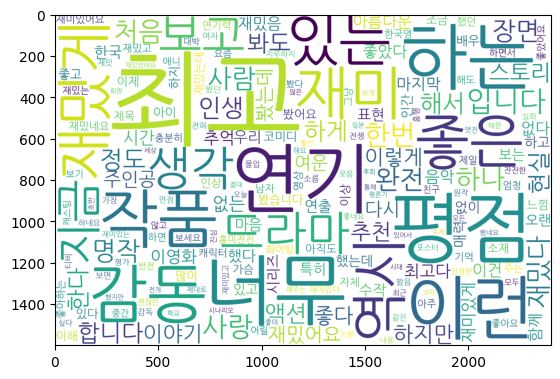

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as  plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path = font_path,
               width=1200, height=800,
               scale=2.0, max_font_size=250,
               background_color = 'white')
gen = wc.generate_from_frequencies(set_pos)
plt.figure()
plt.imshow(gen)

### 부정리뷰 추출

In [11]:
df = df.dropna() # 결측값 제거
neg = df[df['label']==0]

total_neg=''
for i, row in neg.iterrows():
  total_neg += ' '.join(row['keywords'].split(' '))
  total_neg += ' '

In [12]:
total_neg

'짜증나네요 목소리 더빙 추천 보는것을 밓었 무재 래서 평점 조정 재미 이야기 없다 학년 초등학교 아까 생인 살용 했다 제대로 원작 살려내지못 긴장감 반복 해도 하는 이응경 연기 횡단보도 쳐나 이범수 울면 연기 어거지 감동 취향 존중 스토리 하는데 표절 재미 이해 없어지냐 음식 별로 바베트 만찬 할랫 지루하다 중반 주제 좋은데 짤랐을꺼 없었던거야 납득 꺼야 그럴꺼야 카밀라 발연기 진부하고말 아까워 쓰레기 시간 도안 죄인 입니다 기대했던 일까 했던건 하고자 틱장애 키이라 포스터 있어 보이는데 관객 완전 없고 하나 웃긴거도 없음 낭비 평점 시간 속지 마시길 이민기 공감 파손 툭하면 캐릭터 하더군 이런거 없냐 수준 북한 합니다 우리 사랑 포퐁 진호 저그 작은 세르게이 혼자 했더니 원한 어쩌라고 애가 최고 심심한 카리스마 예측 없는 악역 보는내내 중간 아무튼 불알 당황 느낌 평범함 평범한 조금 일상 밋밋한게 빨리 한두 짜증 주인공 전개도 캐릭터 중반 재탕 작품 이제 초반 짜리 지루하고 연기력 손예진 뽑는게 박시환 맞냐 망신 노래실력 일본 이런 유치하다 건가 졸작 전개 어이없는 어설픈 결말 했던 항거 폭도 왕조 온몸 실망 매우 갈등 흥행 화해 한국영 평점 시작 사진 불안하더니만 분만 보며 진창 하는지도 엉망 모르겠고 먹고 이건 우뢰매 입니다 쓰레기 였다 별루 최악 성룡 화신 클라라 아닌데 볼라 본거 캐스팅 진심 재미없음 이훨 쓰면 봅니다 고은님 감독 않았고 스토리 무섭지도 했으면 있게 은은하고 억지스럽고 어땠을까 킬링타임 태어나서 처음 중간 불륜 로맨스 했구나 하아 하네 짬뽕 짜증 시간 솔직히 별루더 느낌 낭비 이상해 내용 전개 느리다 너무나 내용 흥미 전개 이야기 안되는군 소재 절대 쓰레기 보지마라 허풍 포장 특유 중국인 있어 좋았을텐데 잡는 이건 우상화 설정 별로 일까 아니 연기자 문제 했음 진심 전혀 제대로 욕심 어느 보여줬다면 많았던 빵점 않다 아주 모자라진 하고 믿어지냐 뫼비우스 만들어졌다는게 도둑 케이블 줬으면 나와 그만 하나 차이밍량 짬뽕 이냐리 섞인 없음

In [13]:
from collections import Counter

result = Counter(total_neg.split())
result

Counter({'짜증나네요': 3,
         '목소리': 4,
         '더빙': 12,
         '추천': 22,
         '보는것을': 2,
         '밓었': 1,
         '무재': 1,
         '래서': 1,
         '평점': 218,
         '조정': 3,
         '재미': 132,
         '이야기': 50,
         '없다': 102,
         '학년': 5,
         '초등학교': 3,
         '아까': 19,
         '생인': 1,
         '살용': 1,
         '했다': 38,
         '제대로': 21,
         '원작': 21,
         '살려내지못': 1,
         '긴장감': 6,
         '반복': 3,
         '해도': 26,
         '하는': 143,
         '이응경': 1,
         '연기': 104,
         '횡단보도': 1,
         '쳐나': 1,
         '이범수': 1,
         '울면': 2,
         '어거지': 3,
         '감동': 13,
         '취향': 15,
         '존중': 3,
         '스토리': 105,
         '하는데': 26,
         '표절': 10,
         '이해': 51,
         '없어지냐': 1,
         '음식': 1,
         '별로': 70,
         '바베트': 1,
         '만찬': 1,
         '할랫': 1,
         '지루하다': 30,
         '중반': 9,
         '주제': 11,
         '좋은데': 15,
         '짤랐을꺼': 1,
         '없었던거야': 1,
   

In [14]:
# 자료 형식을 딕셔너리로 바꿔주기
word = []
count = []
for x in result:
  # print(x,result[x])
  word.append(x)
  count.append(result[x])

set_neg = dict(zip(word, count))
print(len(set_neg))

7693


### 워드 클라우드

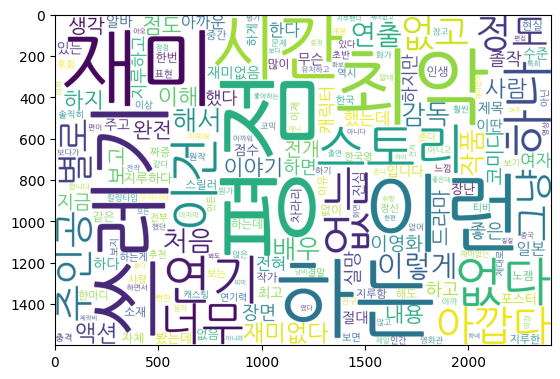

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as  plt

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path = font_path,
               width=1200, height=800,
               scale=2.0, max_font_size=250,
               background_color = 'white')
gen = wc.generate_from_frequencies(set_neg)
plt.figure()
plt.imshow(gen)

- 워드클라우드 한번에 비교하기

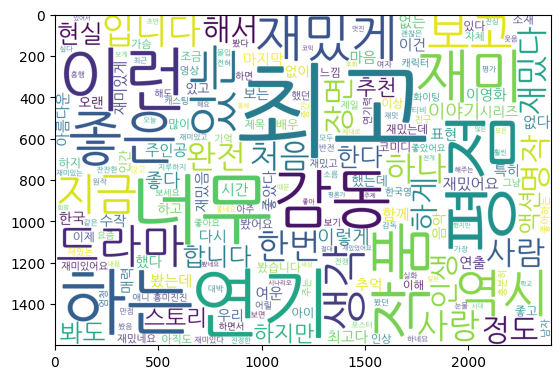

In [24]:
# 긍정
gen = wc.generate_from_frequencies(set_pos)
plt.figure()
plt.imshow(gen)

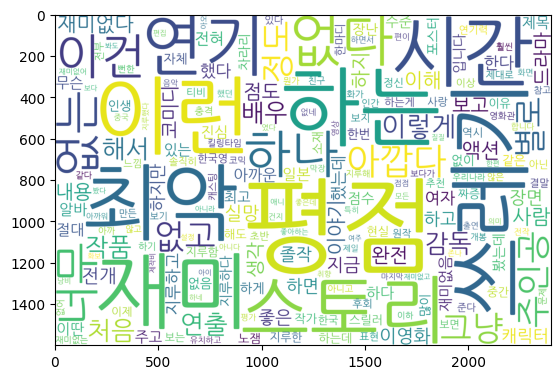

In [25]:
# 부정
gen = wc.generate_from_frequencies(set_neg)
plt.figure()
plt.imshow(gen)

- (추가) 키워드추출 방법 중 다른 방법인 TextRank도 공부해보기<br/>
https://lovit.github.io/nlp/2019/04/30/textrank/